In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the preprocessed dataset
df = pd.read_csv(
    'Preprocessed_Dog_Bite_Dataset.csv', 
    parse_dates=['Incident Date', 'Date Reported ']
)

In [3]:
# Preview the dataset
df.head()

,Bite Number,Bite Type,Incident Date,Victim Age,Victim Relationship,Bite Location,Bite Severity,Bite Circumstance,Controlled By,Treatment Cost,Date Reported,Report Delay (Days),Day of Week,Time of Day,City,State
0,B17-009452,CONTACT,2020-09-08 07:45:00,28,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,0.0,2017-09-09,0.0,Tuesday,Morning,DR,DR
1,B17-009452,CONTACT,2020-09-08 07:45:00,28,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,0.0,2017-09-09,0.0,Tuesday,Morning,DR,DR
2,B17-009452,CONTACT,2020-09-08 07:45:00,50,NEIGHBOR,R HAND,MINOR,BITE/SCRAT,UNKNOWN,0.0,2017-09-09,0.0,Tuesday,Morning,DR,DR
3,B18-010201,BITE,2020-02-18 18:00:00,28,OWNED,HANDS,PUNCTURE,HUGGING,OWNER,0.0,2018-02-19,0.0,Tuesday,Evening,AVE,TX
4,B20-014629,BITE,2020-06-10 13:00:00,28,STRANGER,L HAND,PUNCTURE,PETTING,OTHER,0.0,2020-06-10,0.0,Wednesday,Afternoon,CIR,TX


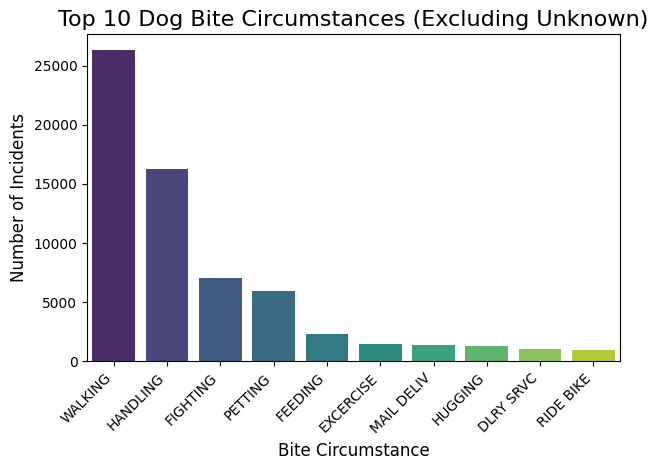

In [4]:
# Top 10 Bite Circumstances
# Filter out 'UNKNOWN' categories and count the top 10
circumstance_counts = (
    df[df['Bite Circumstance'] != 'UNKNOWN']['Bite Circumstance']
    .value_counts()
    .head(10)
)

# Plotting
sns.barplot(
    x=circumstance_counts.index, 
    y=circumstance_counts.values, 
    hue=circumstance_counts.index,
    palette='viridis',
    legend=False
)
plt.title('Top 10 Dog Bite Circumstances (Excluding Unknown)', fontsize=16)
plt.xlabel('Bite Circumstance', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot
plt.savefig('top_10_bite_circumstances.png')
plt.show()

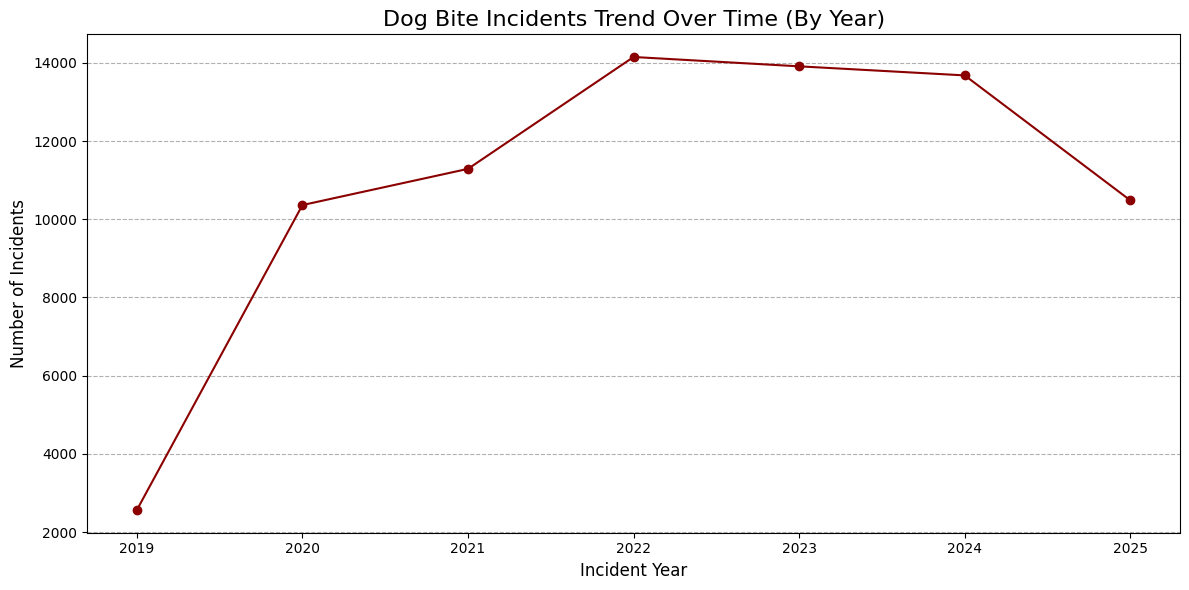

In [5]:
# Incident Trend Over Time (by Year)
df['Incident Year'] = df['Incident Date'].dt.year

# Filter for reasonable year range to avoid outliers from date cleaning
year_counts_raw = df['Incident Year'].value_counts()
valid_years = year_counts_raw[year_counts_raw > 100].index
df_filtered = df[df['Incident Year'].isin(valid_years)].copy()
year_counts = df_filtered['Incident Year'].value_counts().sort_index()

# Plotting Annual Trend
plt.figure(figsize=(12, 6))
year_counts.plot(kind='line', marker='o', color='darkred') 
plt.title('Dog Bite Incidents Trend Over Time (By Year)', fontsize=16)
plt.xlabel('Incident Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('incident_trend_by_year.png')
plt.show()

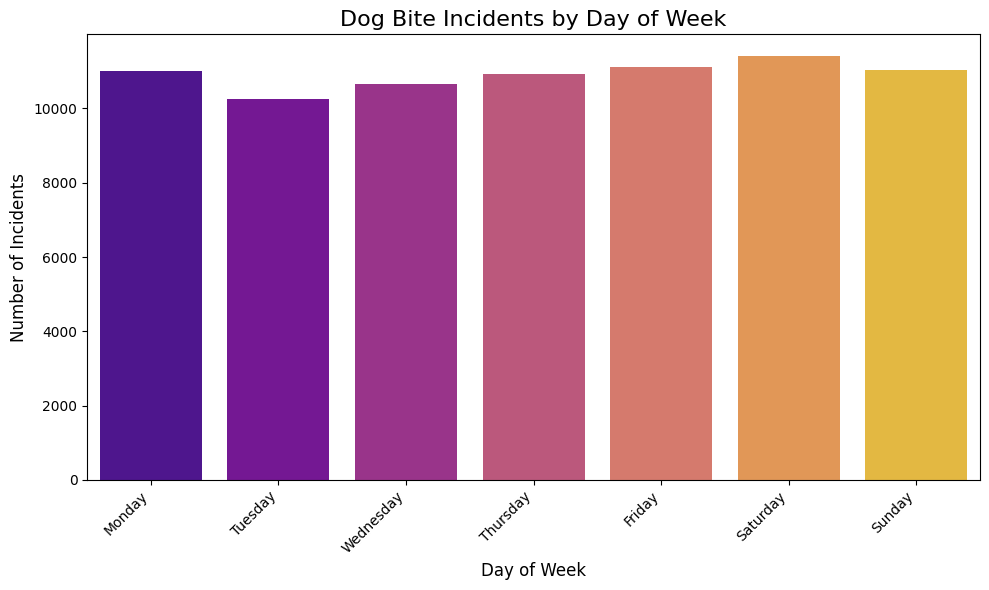

In [6]:
# Incidents by Day of Week
# Define a proper order for days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df_filtered['Day of Week'].value_counts().reindex(day_order)

# Plotting Day of Week Distribution
plt.figure(figsize=(10, 6))

sns.barplot(
    x=day_counts.index, 
    y=day_counts.values, 
    hue=day_counts.index,
    palette='plasma',
    legend=False
)

plt.title('Dog Bite Incidents by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('incidents_by_day_of_week.png')
plt.show()

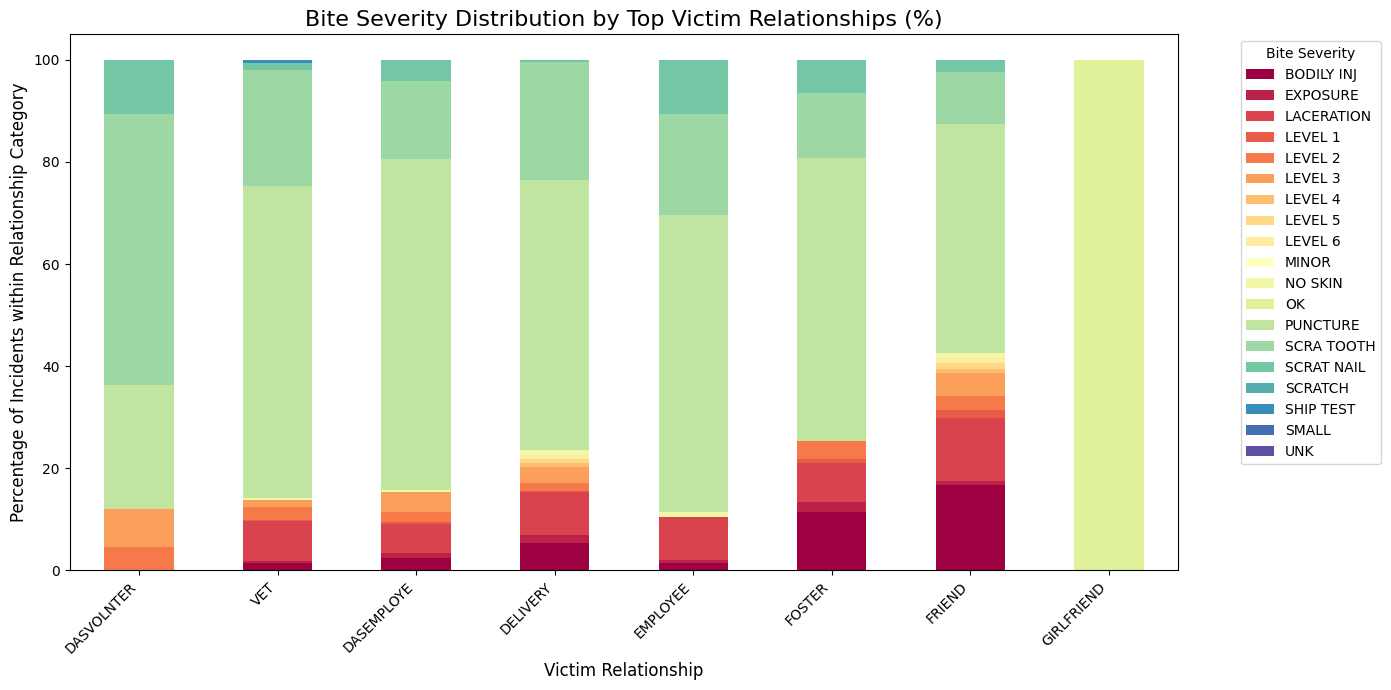

In [7]:
# Bite Severity by Victim Relationship
severity_relationship = (
    df[(df['Bite Severity'] != 'UNKNOWN') & (df['Victim Relationship'] != 'UNKNOWN')]
    .groupby('Victim Relationship')['Bite Severity']
    .value_counts(normalize=True) # Use normalize=True to get percentages (proportions)
    .mul(100) # Convert to percentage
    .unstack(fill_value=0) # Pivot the severity counts to columns
)

# Sort severity columns alphabetically for better plotting consistency if needed, but let's assume natural order
# For the plot, keeping only the top relationships for clarity
top_relationships = severity_relationship.sum(axis=1).nlargest(8).index
severity_relationship_top = severity_relationship.loc[top_relationships]

# Plotting Stacked Bar Chart
plt.figure(figsize=(14, 7))
severity_relationship_top.plot(kind='bar', stacked=True, colormap='Spectral', ax=plt.gca())

plt.title('Bite Severity Distribution by Top Victim Relationships (%)', fontsize=16)
plt.xlabel('Victim Relationship', fontsize=12)
plt.ylabel('Percentage of Incidents within Relationship Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Bite Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('severity_by_relationship_stacked.png')
plt.show()

In [8]:
# Final Data Export For Dasboard creation in Power BI

# Drop helper column used for trend analysis
df.drop(columns=['Incident Year'], inplace=True, errors='ignore')

# Define a mapping for clean, underscore-separated column names
column_rename_map = {
    'Bite Number': 'Bite_Number',
    'Incident Date': 'Incident_Date',
    'Date Reported ': 'Date_Reported',
    'Report Delay (Days)': 'Report_Delay_Days',
    'Day of Week': 'Day_of_Week',
    'Time of Day': 'Time_of_Day',
    'Victim Age': 'Victim_Age',
    'Victim Relationship': 'Victim_Relationship',
    'Bite Severity': 'Bite_Severity',
    'Treatment Cost': 'Treatment_Cost',
    'Bite Type': 'Bite_Type',
    'Bite Location': 'Bite_Location',
    'Bite Circumstance': 'Bite_Circumstance',
    'Controlled By': 'Controlled_By',
    'City': 'City',
    'State': 'State'
}

# Rename columns
df.rename(columns=column_rename_map, inplace=True)

# Select and reorder columns using the NEW names
cleaned_cols = list(column_rename_map.values()) 
df_cleaned_final = df[cleaned_cols]

# Export to CSV
df_cleaned_final.to_csv('Cleaned_Dog_Bite_Dataset.csv', index=False)